In [ ]:
# Mounting with Drive

# from google.colab import drive
# drive.mount('/content/drive')

In [1]:
# Importing Data and Reshaping
import pandas as pd
import numpy as np


# Data_Split
train_x_data = pd.read_csv("/content/drive/My Drive/8th_Sem_Internship/Printed/Data_Split/X_train.csv")
test_x_data = pd.read_csv("/content/drive/My Drive/8th_Sem_Internship/Printed/Data_Split/X_test.csv")
train_y_data = pd.read_csv("/content/drive/My Drive/8th_Sem_Internship/Printed/Data_Split/Y_train.csv")
test_y_data = pd.read_csv("/content/drive/My Drive/8th_Sem_Internship/Printed/Data_Split/Y_test.csv")

In [2]:
IMG_SIZE = 32
# from PIL import Image as im 
# from matplotlib import pyplot as plt


# X-train
read = train_x_data.iloc[:,:].values
x_train = np.array(read)
x_train = read.reshape(x_train.shape[0],IMG_SIZE,IMG_SIZE,3)

# X-test
read = test_x_data.iloc[:,:].values
x_test = np.array(read)
x_test = read.reshape(x_test.shape[0],IMG_SIZE,IMG_SIZE,3)

# Y-train
read = train_y_data.iloc[:,:].values
y_train = np.array(read)
y_train = read.reshape(y_train.shape[0],)

# Y-test
read = test_y_data.iloc[:,:].values
y_test = np.array(read)
y_test = read.reshape(y_test.shape[0],)

X_train = x_train.astype('float32')
X_test = x_test.astype('float32')
Y_train = y_train.astype('float32')
Y_test = y_test.astype('float32')

X_train /= 255.0
X_test /= 255.0

# print(X_train[2998].shape)
# plt.imshow(X_train[2998], interpolation='nearest')
# plt.show()

print("X-Train Shape : ", X_train.shape)
print("Y-Train Shape : ", Y_train.shape)
print("X-Test Shape : ", X_test.shape)
print("Y-Test Shape : ", Y_test.shape)

X-Train Shape :  (107635, 32, 32, 3)
Y-Train Shape :  (107635,)
X-Test Shape :  (26908, 32, 32, 3)
Y-Test Shape :  (26908,)


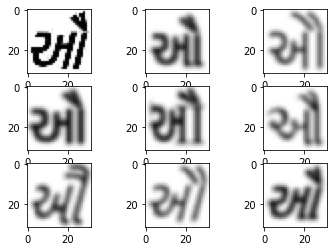

In [ ]:
import matplotlib.pyplot as plt

# plot first few images
for i in range(9):
  # define subplot
  plt.subplot(330 + i + 1)
	# plot raw pixel data
  plt.imshow(X_train[i])
# show the figure
plt.show()

In [3]:
from keras.utils import to_categorical

Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)
print(Y_test.shape)

(26908, 385)


In [4]:
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, BatchNormalization, Dropout
from keras.optimizers import Adam
from keras.losses import categorical_crossentropy
from keras.models import Sequential

In [ ]:
model = Sequential()
model.add(Conv2D(32, (5, 5), input_shape=(32, 32, 3), activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(Y_test.shape[1], activation='softmax'))

model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 32)        2432      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               802944    
_________________________________________________________________
dense_6 (Dense)              (None, 385)               49665     
Total params: 855,041
Trainable params: 855,041
Non-trainable params: 0
________________________________________________

In [ ]:
train_model = model.fit(X_train, Y_train, batch_size=128, epochs=10, verbose=2, validation_data=(X_test, Y_test))

Epoch 1/10
841/841 - 80s - loss: 1.1503 - accuracy: 0.7365 - val_loss: 0.0577 - val_accuracy: 0.9847
Epoch 2/10
841/841 - 80s - loss: 0.1352 - accuracy: 0.9587 - val_loss: 0.0151 - val_accuracy: 0.9958
Epoch 3/10
841/841 - 80s - loss: 0.0903 - accuracy: 0.9721 - val_loss: 0.0254 - val_accuracy: 0.9924
Epoch 4/10
841/841 - 80s - loss: 0.0684 - accuracy: 0.9782 - val_loss: 0.0134 - val_accuracy: 0.9963
Epoch 5/10
841/841 - 80s - loss: 0.0587 - accuracy: 0.9820 - val_loss: 0.0119 - val_accuracy: 0.9956
Epoch 6/10
841/841 - 79s - loss: 0.0518 - accuracy: 0.9844 - val_loss: 0.0125 - val_accuracy: 0.9964
Epoch 7/10
841/841 - 79s - loss: 0.0426 - accuracy: 0.9872 - val_loss: 0.0228 - val_accuracy: 0.9956
Epoch 8/10
841/841 - 79s - loss: 0.0429 - accuracy: 0.9876 - val_loss: 0.0041 - val_accuracy: 0.9981
Epoch 9/10
841/841 - 79s - loss: 0.0348 - accuracy: 0.9899 - val_loss: 0.0056 - val_accuracy: 0.9986
Epoch 10/10
841/841 - 81s - loss: 0.0351 - accuracy: 0.9901 - val_loss: 0.0024 - val_accura

In [ ]:
# Calculating Test Accuracy

test_loss, test_acc = model.evaluate(X_test, Y_test, verbose=0)
print(f'\nTest accuracy: {test_acc*100}')


Test accuracy: 99.93310570716858


In [ ]:
y_pred = model.predict(X_test)
Y_pred = np.argmax(y_pred, 1)

In [ ]:
fig, axis = plt.subplots(4, 4, figsize=(12, 14))
for i, ax in enumerate(axis.flat):
  ax.imshow(X_test[1200 + i], cmap='binary')
  ax.set(title = f"Real Number is {Y_test[1200 + i].argmax()}\nPredict Number is {y_pred[1200 + i].argmax()}");

NameError: ignored

[167]


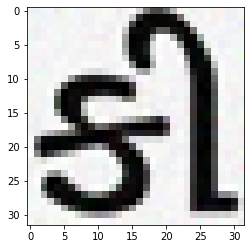

In [ ]:
from PIL import Image as im

example = im.open("/content/drive/My Drive/8th_Sem_Internship/Printed/17.jpg")
image = example.resize((32,32))
value = np.asarray(image.getdata(), dtype=np.int).reshape((-1, 32, 32, 3))

prediction = model.predict(value)
pred = np.argmax(prediction, 1)
print(pred)


value = value.flatten()
new_value = value.reshape(32,32,3)
plt.imshow(new_value)
plt.show()

## Tamil CNN Architecture

In [ ]:
model = Sequential()
model.add(Conv2D(32, (5, 5), input_shape=(32, 32, 3), activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D())

# model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(Y_test.shape[1], activation='softmax'))

model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
train_model = model.fit(X_train, Y_train, batch_size=128, epochs=10, verbose=2, validation_data=(X_test, Y_test))

Epoch 1/10
841/841 - 184s - loss: 1.0870 - accuracy: 0.7522 - val_loss: 0.0510 - val_accuracy: 0.9871
Epoch 2/10
841/841 - 181s - loss: 0.0868 - accuracy: 0.9738 - val_loss: 0.0186 - val_accuracy: 0.9944
Epoch 3/10
841/841 - 179s - loss: 0.0534 - accuracy: 0.9841 - val_loss: 0.0091 - val_accuracy: 0.9970
Epoch 4/10
841/841 - 181s - loss: 0.0391 - accuracy: 0.9882 - val_loss: 0.0305 - val_accuracy: 0.9949
Epoch 5/10
841/841 - 180s - loss: 0.0308 - accuracy: 0.9910 - val_loss: 0.0048 - val_accuracy: 0.9982
Epoch 6/10
841/841 - 179s - loss: 0.0274 - accuracy: 0.9920 - val_loss: 0.0114 - val_accuracy: 0.9964
Epoch 7/10
841/841 - 179s - loss: 0.0265 - accuracy: 0.9923 - val_loss: 0.0109 - val_accuracy: 0.9968
Epoch 8/10
841/841 - 179s - loss: 0.0181 - accuracy: 0.9943 - val_loss: 0.0113 - val_accuracy: 0.9970
Epoch 9/10
841/841 - 179s - loss: 0.0195 - accuracy: 0.9944 - val_loss: 0.0101 - val_accuracy: 0.9970
Epoch 10/10
841/841 - 179s - loss: 0.0198 - accuracy: 0.9944 - val_loss: 0.0036 - 

In [ ]:
# Calculating Test Accuracy

test_loss, test_acc = model.evaluate(X_test, Y_test, verbose=0)
print(f'\nTest accuracy: {test_acc*100}')


Test accuracy: 99.89965558052063


In [ ]:
y_pred = model.predict(X_test)
Y_pred = np.argmax(y_pred, 1)

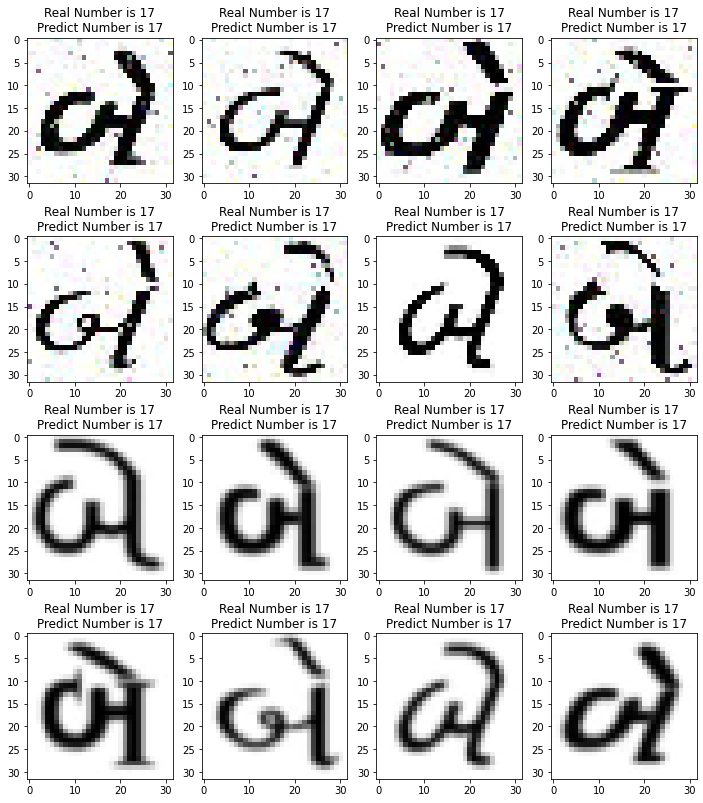

In [ ]:
fig, axis = plt.subplots(4, 4, figsize=(12, 14))
for i, ax in enumerate(axis.flat):
  ax.imshow(X_test[1200 + i], cmap='binary')
  ax.set(title = f"Real Number is {Y_test[1200 + i].argmax()}\nPredict Number is {y_pred[1200 + i].argmax()}");

[167]


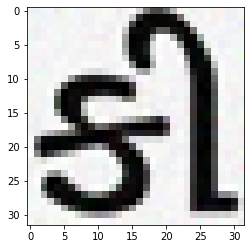

In [ ]:
from PIL import Image as im

example = im.open("/content/drive/My Drive/8th_Sem_Internship/Printed/17.jpg")
image = example.resize((32,32))
value = np.asarray(image.getdata(), dtype=np.int).reshape((-1, 32, 32, 3))

prediction = model.predict(value)
pred = np.argmax(prediction, 1)
print(pred)


value = value.flatten()
new_value = value.reshape(32,32,3)
plt.imshow(new_value)
plt.show()

## Bangla CNN architecture

In [10]:
model = Sequential()
model.add(Conv2D(32, (5, 5), input_shape=(32, 32, 3), activation='relu'))
model.add(Conv2D(32, (5, 5), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D())

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D())

model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(Y_test.shape[1], activation='softmax'))

model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
train_model = model.fit(X_train, Y_train, batch_size=128, epochs=10, verbose=2, validation_data=(X_test, Y_test))

Epoch 1/10
841/841 - 721s - loss: 0.0615 - accuracy: 0.9834 - val_loss: 0.0024 - val_accuracy: 0.9998
Epoch 2/10
841/841 - 709s - loss: 0.0407 - accuracy: 0.9882 - val_loss: 0.0021 - val_accuracy: 0.9999
Epoch 3/10
841/841 - 736s - loss: 0.0416 - accuracy: 0.9874 - val_loss: 0.0023 - val_accuracy: 0.9995
Epoch 4/10
841/841 - 729s - loss: 0.0390 - accuracy: 0.9881 - val_loss: 0.0044 - val_accuracy: 0.9989
Epoch 5/10
841/841 - 734s - loss: 0.0329 - accuracy: 0.9898 - val_loss: 0.0051 - val_accuracy: 0.9986
Epoch 6/10
841/841 - 748s - loss: 0.0279 - accuracy: 0.9914 - val_loss: 0.0012 - val_accuracy: 0.9997
Epoch 7/10


In [ ]:
# Calculating Test Accuracy

test_loss, test_acc = model.evaluate(X_test, Y_test, verbose=0)
print(f'\nTest accuracy: {test_acc*100}')